## Natural Language Processing

### Importing packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing dataset

In [4]:
dataset = pd.read_csv("data/Restaurant_Reviews.tsv", delimiter="\t", quoting=3)
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


### Cleaning the texts

In [7]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Windows
[nltk_data]     11\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [11]:
def clfunc(r):
    aux = re.sub('[^a-zA-Z]', ' ', r)
    aux = aux.lower()
    aux = aux.split()
    ps = PorterStemmer()
    all_stopwrods = stopwords.words('english')
    all_stopwrods.remove('not')
    aux = [ps.stem(word) for word in aux if not word in set(all_stopwrods)]
    aux = ' '.join(aux)
    return aux

In [12]:
corpus = [clfunc(r) for r in list(dataset.Review)]
corpus[:10]


['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

### Creating the bag of words model

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 3000)
X = cv.fit_transform(corpus).toarray()
y = dataset["Liked"].values

In [32]:
X.shape, y.shape

((1000, 1566), (1000,))

### Splitting the dataset into the Trianing set and Test set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training and evaluating model

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

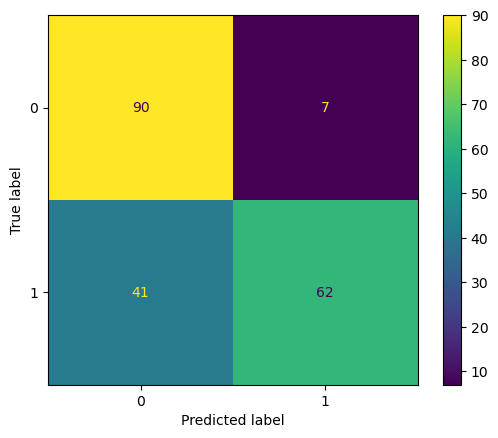

              precision    recall  f1-score   support

           0       0.69      0.93      0.79        97
           1       0.90      0.60      0.72       103

    accuracy                           0.76       200
   macro avg       0.79      0.76      0.76       200
weighted avg       0.80      0.76      0.75       200



In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_hat = list(clf.predict(X_test))
y_true = list(y_test)
cm = confusion_matrix(y_true, y_hat, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()
print(classification_report(y_true, y_hat))